# Brain Tumor Detection

In [ ]:
import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'brain-tumor-classification-mri:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F672377%2F1183165%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240313%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240313T215411Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D668c50921eb063bde8f42e4d9fbf2b200bd94d97538cdd9aaf9fe5f6f35d0058b090d2c4e1738d13c75a24e984b76d464103b0d884fa3f7df3c3ffe80df76528cf683705becab4f36db4cb9c564ecac548033aa7b09b678ec3917fe38fab13853bd9eeb070742242e95f2bf21a5800838608324754c4c21fced01fbacbec3d4982be5ff8c2724179b6446eae9ab7ec715d12f16056eabbaf83d9c52471447ef52fc6a67981d99577fee29a4b9dbcea9122a6aa7829207d2813f51220bd86245dd4b1e7ad5fdd8d853c90d393b0fe972faa2278f61042c0fbb196e27ab2ca955e040c5878f1e1189a90535cb5dc43584d2738ab8fb81c8331982a66eefbda01b3'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 91002358 bytes downloaded
Downloaded and uncompressed: brain-tumor-classification-mri
Data source import complete.




# <p style="background-color:#808080;font-family:newtimeroman;color:#000000;font-size:150%;text-align:center;border-radius:40px 40px;">Importing Modules</p>

In [ ]:
import seaborn as sns
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
import keras
!pip install keras-tuner --upgrade
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D
from tensorflow.keras.optimizers import Adam
from kerastuner import RandomSearch
import os
import numpy as np
import torch
import glob
import torch.nn as nn
from torchvision.transforms import transforms
from torch.utils.data import DataLoader
from torch.optim import Adam
from torch.autograd import Variable
import torchvision
import pathlib
import pandas as pd
import numpy as np
from skimage.io import imread
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from tqdm import tqdm
import torch
from torch.autograd import Variable
from torch.nn import Linear, ReLU, CrossEntropyLoss, Sequential, Conv2d, MaxPool2d, Module, Softmax, BatchNorm2d, Dropout
from torch.optim import Adam, SGD
import warnings
warnings.filterwarnings("ignore")



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 1.5 MB/s eta 0:00:00


<ipython-input-2-96787124fc74>:18: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner import RandomSearch




# <p style="background-color:#808080;font-family:newtimeroman;color:#000000;font-size:150%;text-align:center;border-radius:40px 40px;">Building Model Using Keras</p>



# <p style="background-color:#808080;font-family:newtimeroman;color:#000000;font-size:150%;text-align:center;border-radius:40px 40px;">Preparing The Data For Keras Model</p>

In [ ]:
train_img = []
train_labels = []

test_img = []
test_labels = []

path_train = ('/kaggle/input/brain-tumor-classification-mri/Training/')
path_test = ('/kaggle/input/brain-tumor-classification-mri/Testing/')
img_size= 300

for i in os.listdir(path_train):
    for j in os.listdir(path_train+i):
        train_img.append (cv2.resize(cv2.imread(path_train+i+'/'+j), (img_size,img_size)))
        train_labels.append(i)

for i in os.listdir(path_test):
    for j in os.listdir(path_test+i):
        test_img.append (cv2.resize(cv2.imread(path_test+i+'/'+j), (img_size,img_size)))
        test_labels.append(i)

train_img = (np.array(train_img))
test_img = (np.array(test_img))


train_labels_encoded = [0 if category == 'no_tumor' else(1 if category == 'glioma_tumor' else(2 if category=='meningioma_tumor' else 3)) for category in list(train_labels)]
test_labels_encoded = [0 if category == 'no_tumor' else(1 if category == 'glioma_tumor' else(2 if category=='meningioma_tumor' else 3)) for category in list(test_labels)]

In [ ]:
print("Shape of train: ",(train_img).shape," and shape of test: ", (test_img).shape)

Shape of train:  (2870, 300, 300, 3)  and shape of test:  (394, 300, 300, 3)




# <p style="background-color:#808080;font-family:newtimeroman;color:#000000;font-size:150%;text-align:center;border-radius:40px 40px;">Augmenting The Data</p>

In [ ]:

img_datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True)

img_datagen.fit(train_img)
img_datagen.fit(test_img)

In [ ]:
train_x, val_x, train_y, val_y = train_test_split(np.array(train_img), np.array(train_labels), test_size = 0.1)
train_x.shape, train_y.shape, val_x.shape, val_y.shape


((2583, 300, 300, 3), (2583,), (287, 300, 300, 3), (287,))



# <p style="background-color:#808080;font-family:newtimeroman;color:#000000;font-size:150%;text-align:center;border-radius:40px 40px;">Some Visualizations</p>

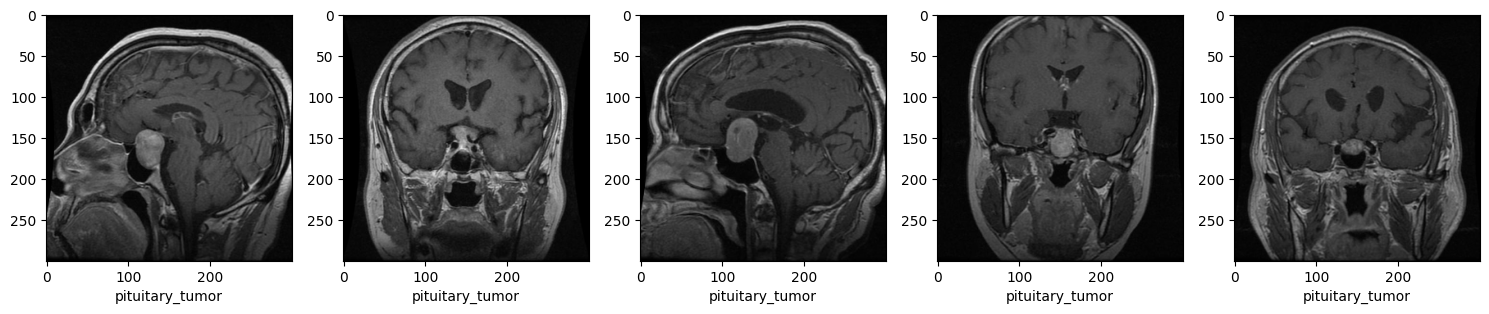

In [ ]:
plt.figure(figsize = (15,15));
for i,j in enumerate(train_img):
    if i<5:
        plt.subplot(1,5,i+1)
        plt.imshow(j);
        plt.xlabel(train_labels[i]);
        plt.tight_layout()
    else:
        break

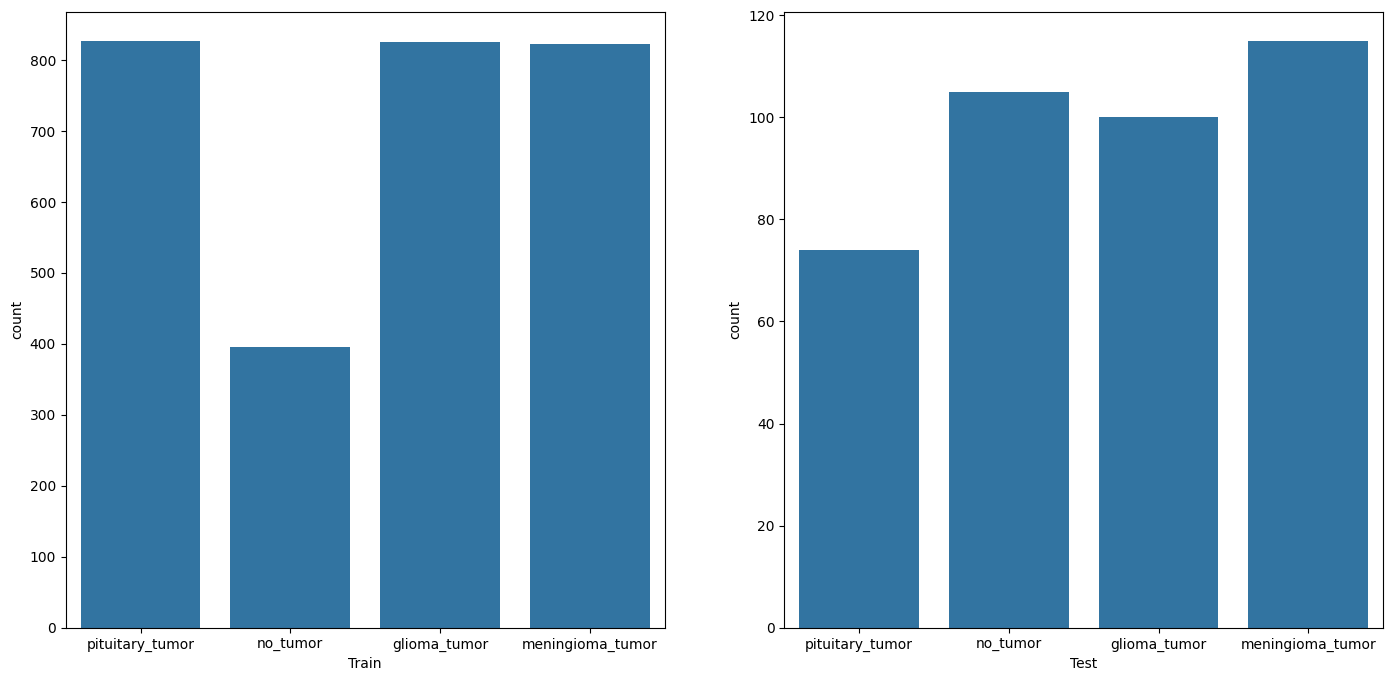

In [ ]:
plt.figure(figsize = (17,8));
lis = ['Train', 'Test']
for i,j in enumerate([train_labels, test_labels]):
    plt.subplot(1,2, i+1);
    sns.countplot(x = j);
    plt.xlabel(lis[i])


In [ ]:
model = tf.keras.Sequential(
        [
          tf.keras.layers.Conv2D(kernel_size=(5,5) ,filters=32, activation='relu', padding='same'),
          tf.keras.layers.MaxPool2D(pool_size=(2,2)),

          tf.keras.layers.Conv2D(kernel_size=(3,3),filters=32, activation='relu', padding='same'),
          tf.keras.layers.MaxPool2D(pool_size=(2,2)),

          tf.keras.layers.Conv2D(kernel_size=(3,3) ,filters=32, activation='relu', padding='same'),
          tf.keras.layers.MaxPool2D(pool_size=(2,2)),

          tf.keras.layers.Conv2D(kernel_size=(3,3) ,filters=64, activation='relu', padding='same'),
          tf.keras.layers.MaxPool2D(pool_size=(2,2)),

          tf.keras.layers.Flatten(),
          tf.keras.layers.Dense(128, activation='relu'),
          tf.keras.layers.Dropout(rate=0.5),
          tf.keras.layers.Dense(4, activation='sigmoid')
  ])
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])



In [ ]:
history = model.fit(tf.cast(train_img, tf.float32), np.array(pd.get_dummies(train_labels)), validation_split=0.1, epochs =20, verbose=1, batch_size=32)

Epoch 1/20
81/81 [==============================] - 24s 112ms/step - loss: 4.3267 - accuracy: 0.5319 - val_loss: 1.4287 - val_accuracy: 0.0732
Epoch 2/20
81/81 [==============================] - 6s 70ms/step - loss: 0.8121 - accuracy: 0.6748 - val_loss: 1.1189 - val_accuracy: 0.3972
Epoch 3/20
81/81 [==============================] - 6s 74ms/step - loss: 0.6531 - accuracy: 0.7356 - val_loss: 0.7256 - val_accuracy: 0.6969
Epoch 4/20
81/81 [==============================] - 6s 70ms/step - loss: 0.5567 - accuracy: 0.7770 - val_loss: 0.8627 - val_accuracy: 0.6934
Epoch 5/20
81/81 [==============================] - 6s 75ms/step - loss: 0.4332 - accuracy: 0.8242 - val_loss: 0.7471 - val_accuracy: 0.7143
Epoch 6/20
81/81 [==============================] - 6s 74ms/step - loss: 0.3579 - accuracy: 0.8525 - val_loss: 0.8811 - val_accuracy: 0.5784
Epoch 7/20
81/81 [==============================] - 6s 75ms/step - loss: 0.3451 - accuracy: 0.8560 - val_loss: 0.5411 - val_accuracy: 0.7979
Epoch 8/20




## <p style="background-color:#808080;font-family:newtimeroman;color:#000000;font-size:150%;text-align:center;border-radius:40px 40px;">Key Notes</p>
> Adding padding here to preserve the image shape

> Adding maxpool layer to get those pixels which have the highest intensity. Reduces the image size by 2.

> Took filters of 7*7 as image size if 300 * 300 thus it would help it to learn better.

> Taken a dropout layer, to avoid overfitting.

 > The image from data generator is of type 'uint8', you need to type cast it to 'float32'.

In [ ]:
model.layers[0].get_weights()[0].shape

(5, 5, 3, 32)



# <p style="background-color:#808080;font-family:newtimeroman;color:#000000;font-size:150%;text-align:center;border-radius:40px 40px;">Building The Model With Pytorch</p>


# <p style="background-color:#808080;font-family:newtimeroman;color:#000000;font-size:150%;text-align:center;border-radius:40px 40px;">Preparing The Data For Pytorch Model</p>

In [ ]:
train_x, val_x, train_y, val_y = train_test_split(np.array(train_img), np.array(train_labels), test_size = 0.1)
train_x.shape, train_y.shape, val_x.shape, val_y.shape


((2583, 300, 300, 3), (2583,), (287, 300, 300, 3), (287,))

# <p style="background-color:#808080;font-family:newtimeroman;color:#000000;font-size:150%;text-align:center;border-radius:40px 40px;">Applying Data Transformations</p>

In [ ]:
transforming_img = transforms.Compose([
    transforms.Resize((150,150)),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize([0.5,0.5,0.5],
                        [0.5,0.5,0.5])
])

In [ ]:

train_path = ('/kaggle/input/brain-tumor-classification-mri/Training/')
test_path = ('/kaggle/input/brain-tumor-classification-mri/Testing/')

train_loader=DataLoader(
    torchvision.datasets.ImageFolder(train_path,transform=transforming_img),
    batch_size=64, shuffle=True
)
test_loader=DataLoader(
    torchvision.datasets.ImageFolder(test_path,transform=transforming_img),
    batch_size=32, shuffle=True
)


#categories
root=pathlib.Path(train_path)
classes=sorted([j.name.split('/')[-1] for j in root.iterdir()])

In [ ]:
print(f'The classes are: {classes}')

The classes are: ['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']


In [ ]:
device=torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device


train_count=len(glob.glob(train_path+'/**/*.jpg'))
test_count=len(glob.glob(test_path+'/**/*.jpg'))

In [ ]:


class ConvNet(nn.Module):
    def __init__(self,num_classes=4):
        super(ConvNet,self).__init__()


        self.conv1=nn.Conv2d(in_channels=3, out_channels=12, kernel_size=3, stride=1, padding=1)

        self.bn1=nn.BatchNorm2d(num_features=12)
        self.relu1=nn.ReLU()
        self.pool=nn.MaxPool2d(kernel_size=2)
        self.conv2=nn.Conv2d(in_channels=12,out_channels=20,kernel_size=3,stride=1,padding=1)
        self.relu2=nn.ReLU()
        self.conv3=nn.Conv2d(in_channels=20,out_channels=32,kernel_size=3,stride=1,padding=1)
        self.bn3=nn.BatchNorm2d(num_features=32)
        self.relu3=nn.ReLU()
        self.fc=nn.Linear(in_features=75 * 75 * 32,out_features=num_classes)



        #Feed forwad function

    def forward(self,input):
        output=self.conv1(input)
        output=self.bn1(output)
        output=self.relu1(output)
        output=self.pool(output)
        output=self.conv2(output)
        output=self.relu2(output)
        output=self.conv3(output)
        output=self.bn3(output)
        output=self.relu3(output)
        output=output.view(-1,32*75*75)
        output=self.fc(output)

        return output

device=torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model=ConvNet(num_classes=4).to(device)


In [ ]:
for i, (images,labels) in enumerate(train_loader):
        if torch.cuda.is_available():
            images=Variable(images.cuda())
            labels=Variable(labels.cuda())

In [ ]:
images.shape

torch.Size([54, 3, 150, 150])

In [ ]:
#Optmizer and loss function
optimizer=Adam(model.parameters(),lr=0.001,weight_decay=0.0001)
loss_function=nn.CrossEntropyLoss()



best_accuracy=0.0

for epoch in range(20):

    #Evaluation and training on training dataset
    model.train()
    train_accuracy=0.0
    train_loss=0.0

    for i, (images,labels) in enumerate(train_loader):
        if torch.cuda.is_available():
            images=Variable(images.cuda())
            labels=Variable(labels.cuda())

        optimizer.zero_grad()

        outputs=model(images)
        loss=loss_function(outputs,labels)
        loss.backward()
        optimizer.step()


        train_loss+= loss.cpu().data*images.size(0)
        _,prediction=torch.max(outputs.data,1)

        train_accuracy+=int(torch.sum(prediction==labels.data))

    train_accuracy=train_accuracy/train_count
    train_loss=train_loss/train_count


    # Evaluation on testing dataset
    model.eval()

    test_accuracy=0.0
    for i, (images,labels) in enumerate(test_loader):
        if torch.cuda.is_available():
            images=Variable(images.cuda())
            labels=Variable(labels.cuda())

        outputs=model(images)
        _,prediction=torch.max(outputs.data,1)
        test_accuracy+=int(torch.sum(prediction==labels.data))

    test_accuracy=test_accuracy/test_count


    print('Epoch: '+str(epoch)+' Train Loss: '+str(train_loss)+' Train Accuracy: '+str(train_accuracy)+' Test Accuracy: '+str(test_accuracy))

    if test_accuracy>best_accuracy:
        torch.save(model.state_dict(),'best_checkpoint.model')
        best_accuracy=test_accuracy

Epoch: 0 Train Loss: tensor(8.6930) Train Accuracy: 0.5825783972125436 Test Accuracy: 0.4010152284263959
Epoch: 1 Train Loss: tensor(2.4054) Train Accuracy: 0.7209059233449477 Test Accuracy: 0.5406091370558376
Epoch: 2 Train Loss: tensor(1.2248) Train Accuracy: 0.8209059233449477 Test Accuracy: 0.48984771573604063
Epoch: 3 Train Loss: tensor(0.8923) Train Accuracy: 0.8665505226480836 Test Accuracy: 0.6395939086294417
Epoch: 4 Train Loss: tensor(0.4897) Train Accuracy: 0.9055749128919861 Test Accuracy: 0.6751269035532995
Epoch: 5 Train Loss: tensor(0.2889) Train Accuracy: 0.9372822299651568 Test Accuracy: 0.6751269035532995
Epoch: 6 Train Loss: tensor(0.1795) Train Accuracy: 0.9536585365853658 Test Accuracy: 0.6624365482233503
Epoch: 7 Train Loss: tensor(0.2923) Train Accuracy: 0.9393728222996516 Test Accuracy: 0.6928934010152284
Epoch: 8 Train Loss: tensor(0.2495) Train Accuracy: 0.9456445993031359 Test Accuracy: 0.7055837563451777
Epoch: 9 Train Loss: tensor(0.1337) Train Accuracy: 0.